<a href="https://colab.research.google.com/github/lightucha/how-to-opencv/blob/main/opencv_210827.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패캠 openCV ch05 Review 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(cv2.__version__)

4.1.2


In [2]:
gpath = '/content/drive/MyDrive/1.Project/{PATH}/'

### 영상의 기하학적 변환(geometric transformation)
1. 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업<p>
2. 변환이 필요한 이유
- 크기를 축소해야 하는 경우
- 객체가 영상의 정중앙에 있어야 하는 경우
- 회전 영상을 똑바르게 보정

### 이동 변환(Translation transformation)
- 가로 또는 세로 방향으로 영상을 특정 크기만큼 이동시키는 변환
- x, y축 방향으로의 이동 변위를 지정

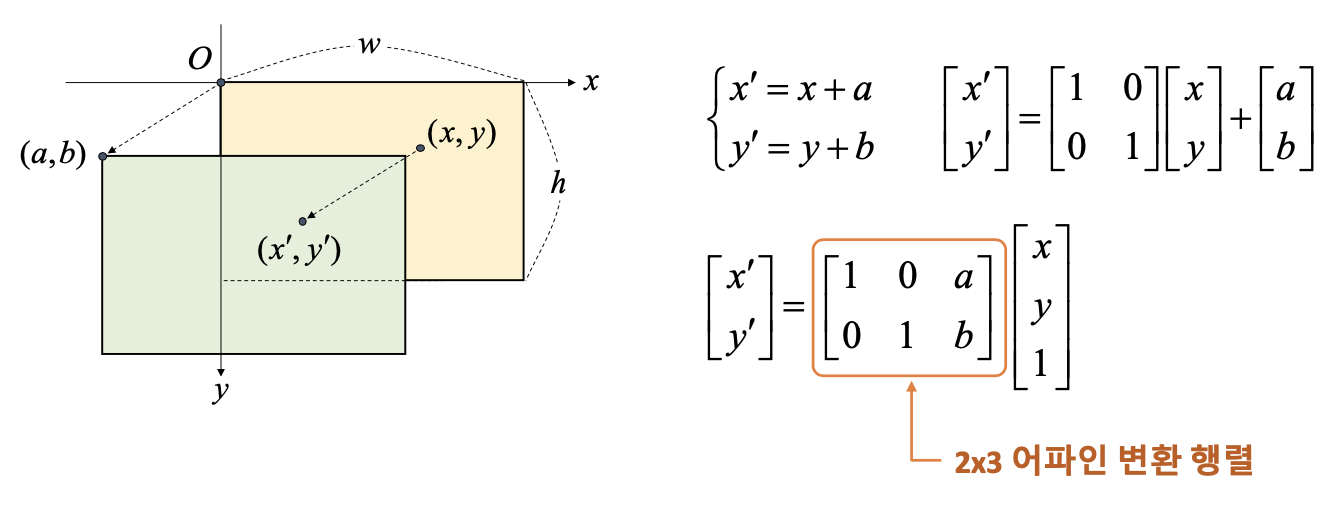

<b>cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)</b>
- M: 2x3 어파인 변환 행렬. 실수형
- dsize: (w, h) -> (0, 0)이면 src와 같은 크기로 설정
- borderValue: 빈 공간을 어떤 색으로 채울지 (default 0-검은색)

(480, 640, 3)


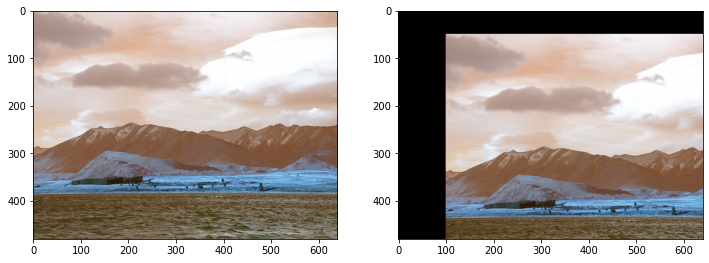

In [3]:
src = cv2.imread(gpath + 'ch05/tekapo.bmp')
print(src.shape)

# 어파인 변환 행렬 생성
aff = np.array([[1, 0, 100],
                [0, 1, 50]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0, 0))
# (0,0) 의미는 입력영상 크기와 동일한 출력 영상 생성

plt.figure(figsize=(12,8))
plt.subplot(121); plt.imshow(src, cmap='gray')
plt.subplot(122); plt.imshow(dst, cmap='gray')
plt.show()

### 전단 변환(Shear transformation)
- 층 밀림 변환: 한 쪽을 찌그러뜨리는 효과
- x, y축 방향에 대해 따로 정의

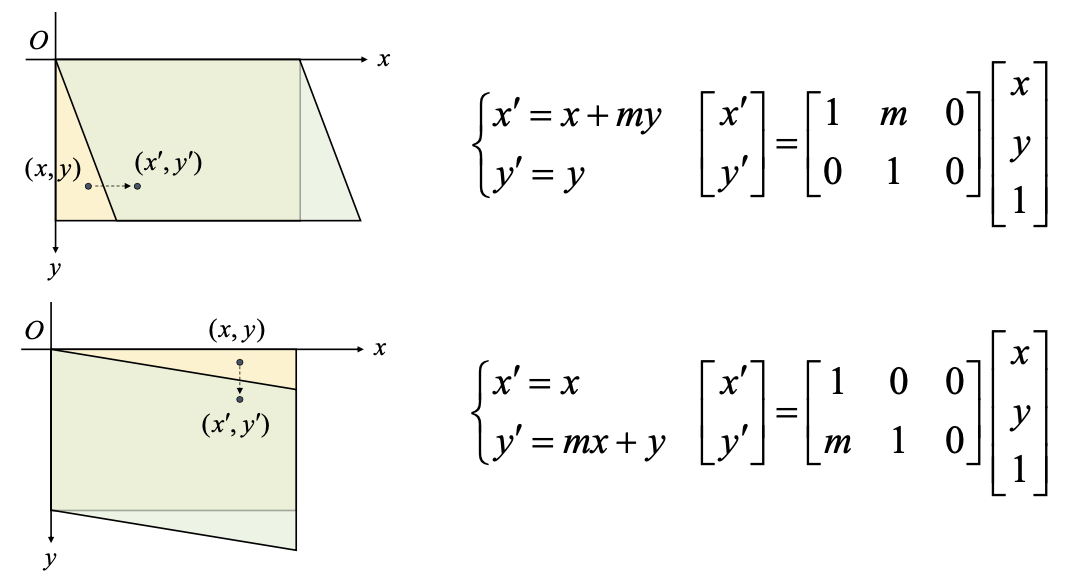

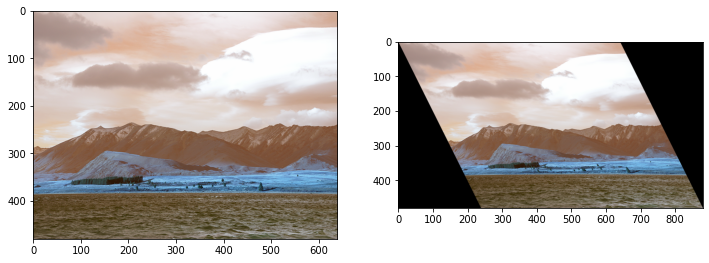

In [4]:
# 어파인 행렬 생성
aff = np.array([[1, 0.5, 0],
                [0, 1, 0]], dtype=np.float32)

# 입력 영상의 크기 추출
h, w = src.shape[:2]

# 입력 영상과 출력 영상의 크기가 동일하다면 영상이 밀린 만큼 짤리게 되므로
# 출력 영상의 크기를 키워줬습니다.
# int를 이용한 경우는 입력값은 실수여야 합니다. 혹시 정수값이 입력될 수 있으므로 int를 이용했습니다.
dst = cv2.warpAffine(src, aff, (w + int(h * 0.5), h))

plt.figure(figsize=(12,8))
plt.subplot(121); plt.imshow(src, cmap='gray')
plt.subplot(122); plt.imshow(dst, cmap='gray')
plt.show()

### 영상의 확대와 축소

### 크기 변환(Scale transformation)
- 영상의 크기를 크게 또는 작게 만드는 변환
- x, y축 방향으로의 스케일 비율 지정

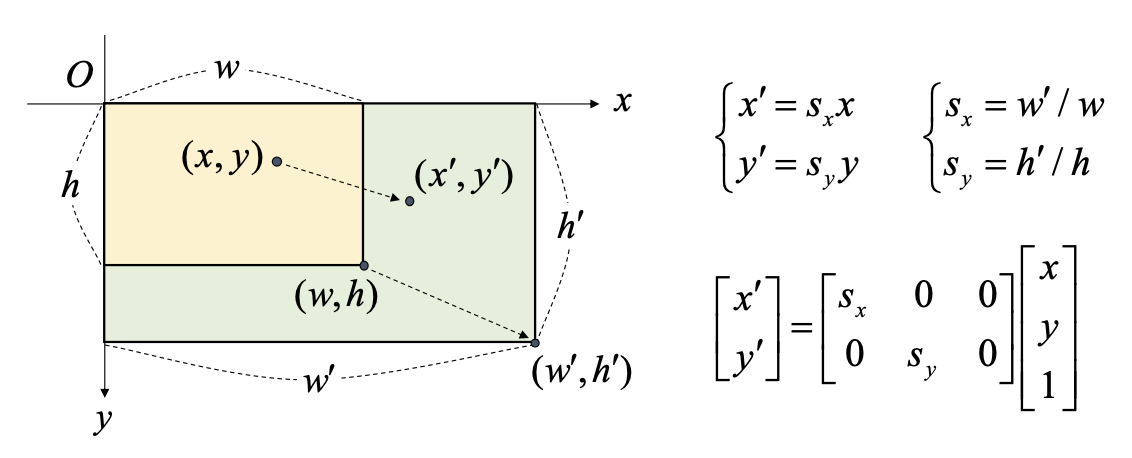

<b>cv2.resize(src, dsize, dst=None, fx=None, fy=None, interpolation=None)</b>
- dsize: 결과의 크기(w, h) ->(0,0)이면 fx와 fy값으로 결정
- fx, fy: 스케일 비율(scale factor, dsize값이 0일 때 유효)

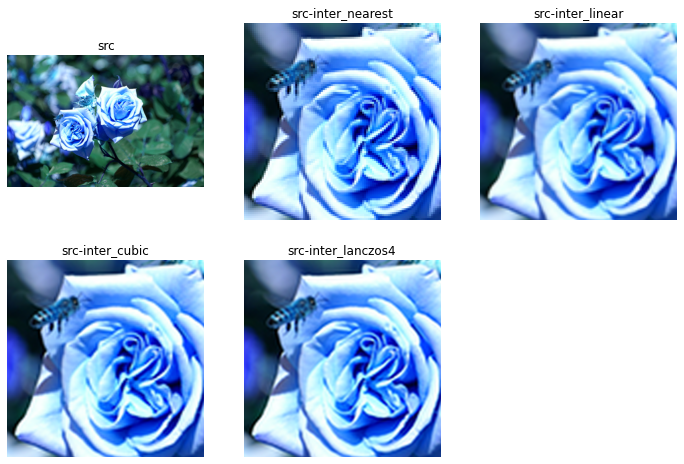

In [5]:
src = cv2.imread(gpath + 'ch05/rose.bmp') # src.shape=(320, 480)

dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST) # 스케일 팩터 이용
dst2 = cv2.resize(src, (1920, 1280))  # cv2.INTER_LINEAR, 픽셀 크기 지정
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC) # 픽셀 크기 지정
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4) # 픽셀 크기 지정

plt.figure(figsize=(12,8))

plt.subplot(231); plt.imshow(src, cmap='gray'), plt.title('src'), plt.axis('off')
# 영상 크기가 너무 커서 일정 부분만 출력
plt.subplot(232); plt.imshow(dst1[500:900, 400:800], cmap='gray'), plt.title('src-inter_nearest'), plt.axis('off')
plt.subplot(233); plt.imshow(dst2[500:900, 400:800], cmap='gray'), plt.title('src-inter_linear'), plt.axis('off')
plt.subplot(234); plt.imshow(dst3[500:900, 400:800], cmap='gray'), plt.title('src-inter_cubic'), plt.axis('off')
plt.subplot(235); plt.imshow(dst4[500:900, 400:800], cmap='gray'), plt.title('src-inter_lanczos4'), plt.axis('off')

plt.show()

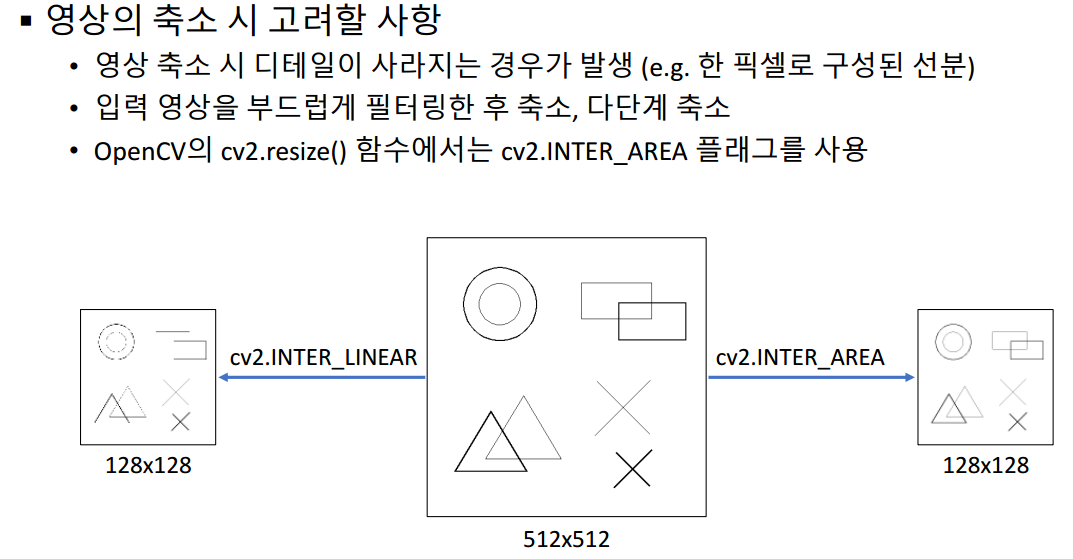

### 영상의 대칭 변환
- 좌우 대칭
- 상하 대칭
- 좌우&상하 대칭

<b>cv2.flip(src, flipCode, dst=None)</b>
- flipcode
 - +1: 좌우 대칭
 - 0: 상하 대칭
 - -1: 좌우 & 상하 대칭

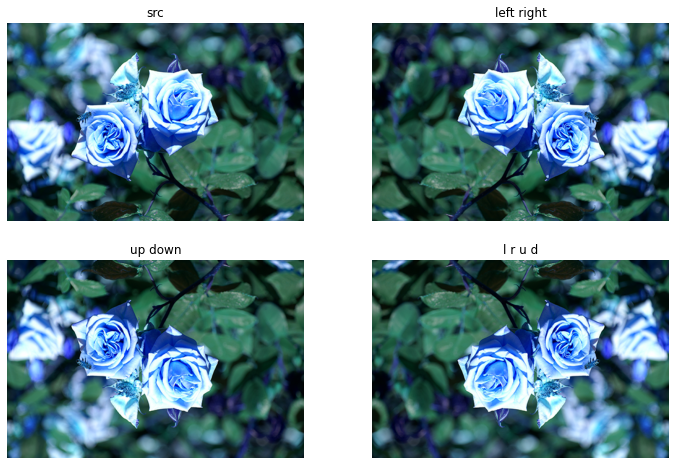

In [6]:
src = cv2.imread(gpath + 'ch05/rose.bmp') # src.shape=(320, 480)

dst1 = cv2.flip(src, 1) # 좌우 대칭
dst2 = cv2.flip(src, 0) # 상하 대칭
dst3 = cv2.flip(src, -1) # 상하 좌우 대칭

plt.figure(figsize=(12, 8))
plt.subplot(221); plt.imshow(src, cmap='gray'); plt.axis('off'); plt.title('src')
plt.subplot(222); plt.imshow(dst1, cmap='gray'); plt.axis('off'); plt.title('left right')
plt.subplot(223); plt.imshow(dst2, cmap='gray'); plt.axis('off'); plt.title('up down')
plt.subplot(224); plt.imshow(dst3, cmap='gray'); plt.axis('off'); plt.title('l r u d')
plt.show()

### 이미지 피라미드
- 하나의 영상에 대해 다양한 해상도의 영상 세트를 구성한 것
- 보통 <u>가우시안 블러링</u> & <u>다운 샘플링</u> 형태로 축소하여 구성

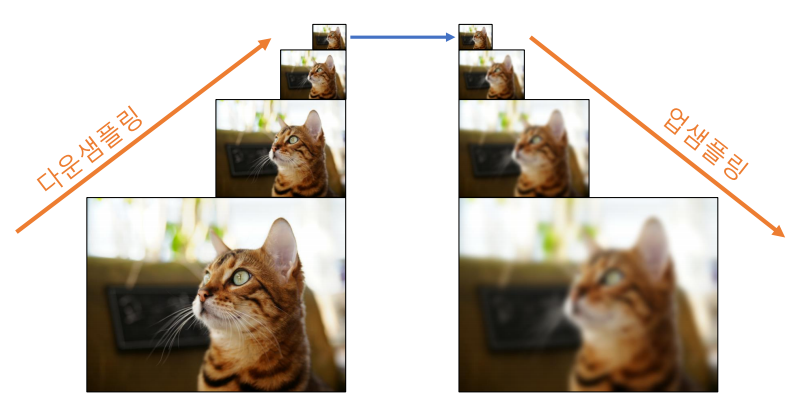

<b>cv2.pryDown(src, dst=None, dstsize=None, borderType=None)</b>
- dstsize: 따로 지정하지 않으면 가로, 세로 크기의 1/2배로 설정
- 작동 방식:
 1. 5x5 크기의 가우시안 필터 적용
 2. 짝수 행과 열을 제거하여 작은 크기의 영상 생성
(resize와 개념은 다르지만 결과는 유사함)

<b>cv2.pryUp(src, dst=None, borderType=None)</b>
- dstsize: 따로 지정하지 않으면 가로, 세로 크기의 2배로 설정

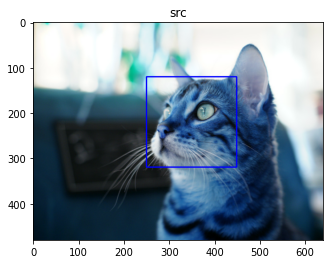

In [18]:
src = cv2.imread(gpath+'ch05/cat.bmp')

rc = (250, 120, 200, 200)  # rectangle tuple

# 원본 영상에 그리기
cpy = src.copy() # 입력 영상의 복사본, 입력영상에 그리면 영상이 변하기 때문에 재사용 불가.
cv2.rectangle(cpy, rc, (0, 0, 255), 2)

plt.imshow(cpy, cmap='gray'); plt.title('src')
plt.show()

# plt.figure(figsize=(12,8))
# 피라미드 영상에 그리기
for i in range(1, 4):      # 4번 축소
    src = cv2.pyrDown(src) # 작게 만들고
    cpy = src.copy()       # 작게 만든 영상의 복사본을 만들고
    # 사각형을 그림, 입력 영상이 줄었는데 그대로 rc를 넣어줌
    # shift 인자는 그림을 그리기 위한 좌표를 얼마큼 줄일 것이냐를 결정. 권장 X
    # 잔상이 남는 이유는 윈도우 바 보다 작게 영상되었을 때 잔상을 갖고옴
    # 해결하기 위해서는 매번 창을 닫아줌
    cv2.rectangle(cpy, rc, (0, 0, 255), 2, shift=i)
    cv2.imwrite(gpath+f'cpy_{i}.jpg', cpy)

    # plt.subplot(1,3,i)
    # plt.imshow(cpy, cmap='gray')
    # plt.title('{} times src'.format(1/2 * i))
    # plt.axis('off')
    # plt.show()

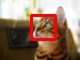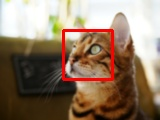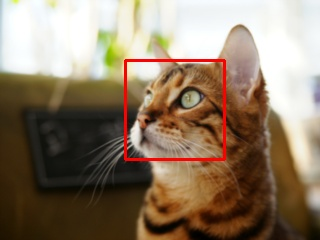

### 회전 변환(rotation transformation)
- 영상의 특정 각도만큼 회전시키는 변환(반시계 방향)


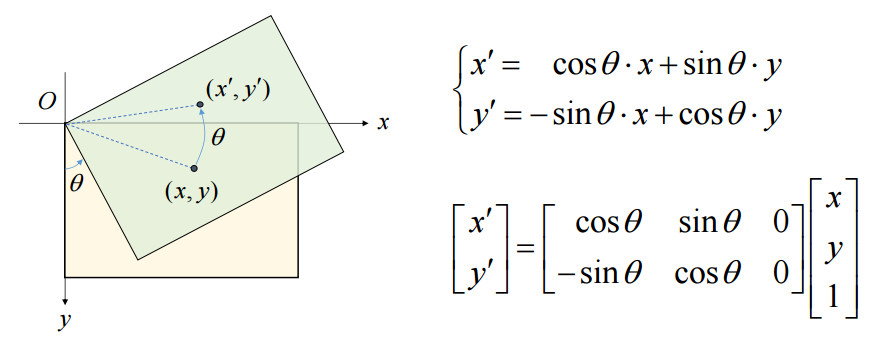

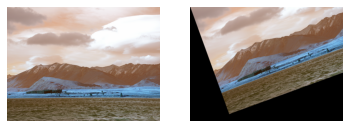

In [8]:
# 영상 좌측 상단 기준 회전
import math

src = cv2.imread(gpath + 'ch05/tekapo.bmp')

rad = 20 * math.pi / 180 # 각도 설정

# np.array로 Affine 행렬 생성
aff = np.array([[math.cos(rad), math.sin(rad), 0],
                [-math.sin(rad), math.cos(rad), 0]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0, 0))

plt.subplot(121); plt.imshow(src); plt.axis('off')
plt.subplot(122); plt.imshow(dst); plt.axis('off')
plt.show()

<b>cv2.getRotationMatrix2D(center, angle, scale) -> 2x3 어파인 변환 행렬</b>
- center: 회전 중심 좌표: (x, y) tuple
- angle: (반시계) 회전 각도(degree): 음수는 시계 방향
- scale: 확대 비율

좌측 상단 기준 회전 (480, 640, 3)
중심 기준 회전 (480, 640, 3)


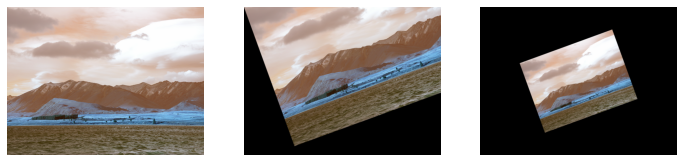

In [9]:
cp = (src.shape[1] / 2, src.shape[0] / 2) # 영상의 가로 1/2, 세로 1/2
rot1 = cv2.getRotationMatrix2D(cp, 20, 0.5) # 20도 회전, 스케일 0.5배
rot2 = cv2.getRotationMatrix2D((0,0), 20, 1)

dst1 = cv2.warpAffine(src, rot1, (0, 0))
dst2 = cv2.warpAffine(src, rot2, (0, 0))

print('좌측 상단 기준 회전',dst1.shape)
print('중심 기준 회전',dst2.shape)

plt.figure(figsize=(12,8))
plt.subplot(131); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(132); plt.imshow(dst2, cmap='gray'); plt.axis('off')
plt.subplot(133); plt.imshow(dst1, cmap='gray'); plt.axis('off')
plt.show()

<u>cv.rotate 차이점!</u> <p>
<b>cv2.rotate(src, dst, rotateCode)</b>

원본 (480, 640, 3)
90도 회전 (640, 480, 3)
180도 회전 (480, 640, 3)
270도 회전 (640, 480, 3)


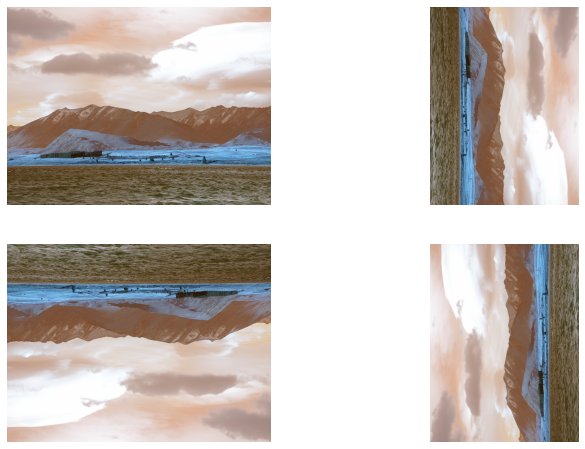

In [10]:
dst1 = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE) # 90 degree
dst2 = cv2.rotate(src, cv2.ROTATE_180) # 180 degree
dst3 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE) # 270 degree

print('원본', src.shape)
print('90도 회전', dst1.shape)
print('180도 회전', dst2.shape)
print('270도 회전', dst3.shape)

plt.figure(figsize=(12, 8))
plt.subplot(221); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(222); plt.imshow(dst1, cmap='gray'); plt.axis('off')
plt.subplot(223); plt.imshow(dst2, cmap='gray'); plt.axis('off')
plt.subplot(224); plt.imshow(dst3, cmap='gray'); plt.axis('off')
plt.show()

### 어파인 변환과 "투시 변환"
- 어파인 변환: 영상의 평행이동, 확대 및 축소, 회전 등의 조합으로 만들 수 있는 기하학적 변환을 의미<p>
 (픽셀의 위치를 일정 규칙에 따라 옮김으로써 영상의 변화를 만들어 내는 것)
- 투시 변환: 직사각형 형태의 영상을 임의의 볼록 사각형 형태로 변경할 수 있는 변환
 - 어파인 변환보다 자유도가 높음(원근이나 공간을 표현)
 - 직선성은 유지되나, 두 직선의 평행관계는 깨질 수 있음

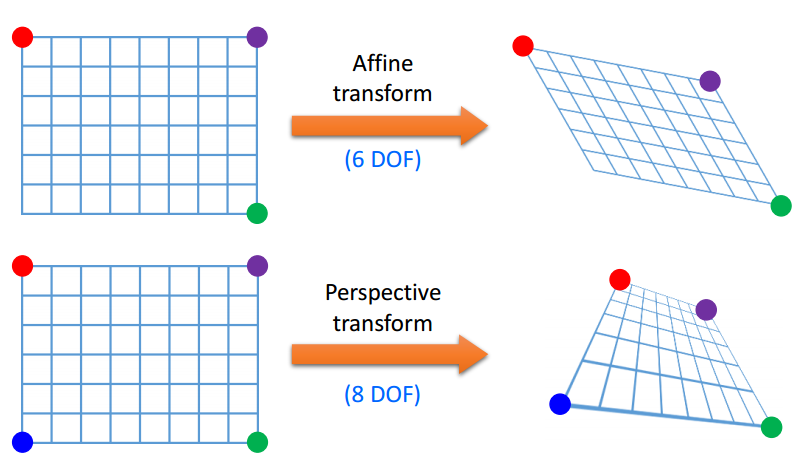

<b>cv2.getAffineTransform(src, dst) -> 2x3 변환 행렬</b>
- src: 3개의 원본 좌표(numpy.ndarray.shape=(3,2))

<b>cv2.getPerspectiveTransform(src, dst, solveMethod=none) -> 3x3 변환 행렬</b>
- src: 4개의 원본 좌표(numpy.ndarray.shape=(4,2))

<b>cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)</b>
- M: 2x3 어파인 변환 행렬
- borderMode: 가장자리 픽셀 확장 방식(default: cv2.INTER_LINEAR)
- borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값(default: 0)

<b>cv2.warpPerspective(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)</b>
- M: 3x3 어파인 변환 행렬
- borderMode: 가장자리 픽셀 확장 방식(default: cv2.INTER_LINEAR)
- borderValue: cv2.BORDER_CONSTANT일 때 사용할 상수 값(default: 0)

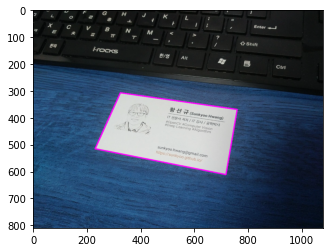

In [11]:
# 샘플: 명함 펴기
src = cv2.imread(gpath+'ch05/namecard.jpg')
cpy = src.copy()

pts = np.array([[325, 307], [760, 369], [718, 611], [231, 515]])
cpy = cv2.polylines(cpy, [pts], True, (255, 0, 255), 4)

plt.imshow(cpy, cmap='gray')
plt.show()

펴진 명함 (400, 720, 3)


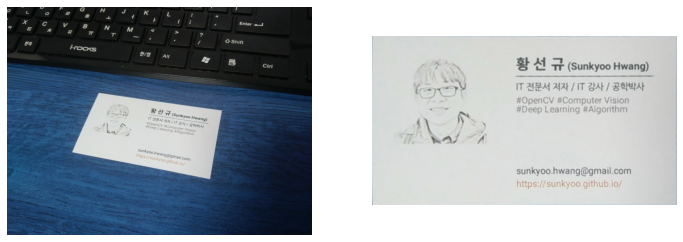

In [12]:
srcQuad = np.array([[325, 307], [760, 369], [718, 611], [231, 515]], np.float32)

w, h = 720, 400
dstQuad = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w, h))
print('펴진 명함', dst.shape)

plt.figure(figsize=(12,8))
plt.subplot(121); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'); plt.axis('off')
plt.show()

### 리매핑
영상의 특성 위치 픽셀을 다른 위치에 재배치하는 작업
- 입력 영상을 직선이 아닌 곡선으로 표현할 수 있어 좀 더 자유도 있는 변환이 가능
- 출력 영상의 좌표를 입력 영상의 어느 좌표를 참조해서 갖고올 것이냐를 설정

<b>cv2.remap(src, map1, map2, interpolation, dst=None, borderMode=None, borderValue=None</b>
- map1: 결과 영상의 (x,y) 좌표가 참조할 입력 영상의 x좌표(np.float32, numpy.ndarray)
- map2: 결과 영상의 (x,y) 좌표가 참조할 입력 영상의 y좌표

In [13]:
src = cv2.imread(gpath + 'ch05/tekapo.bmp')

h, w = src.shape[:2] # 입력 영상의 높이와 넓이 정보 추출
print(h, ' x ',w)

# np.indice는 행렬의 인덱스값 x좌표값 y좌표값을 따로따로 행렬의 형태로 변환해줌
map2, map1 = np.indices((h, w), dtype=np.float32)

print('map1: \n',map1); print('map2: \n', map2)

480  x  640
map1: 
 [[  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 ...
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]]
map2: 
 [[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [477. 477. 477. ... 477. 477. 477.]
 [478. 478. 478. ... 478. 478. 478.]
 [479. 479. 479. ... 479. 479. 479.]]


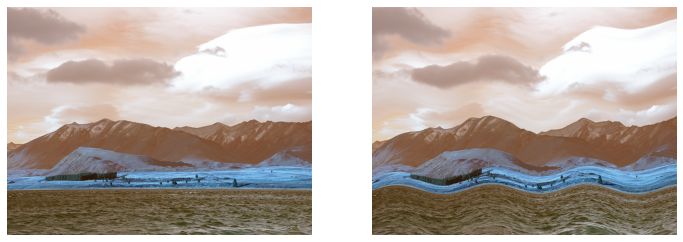

In [14]:
# y좌표에 sin함수를 줬는데 파도처럼 꿀렁꿀렁하게 하기 위해서
# y좌표 값에 10픽셀만큼 꿀렁꿀렁 거릴 수 있도록.
# sin함수가 x좌표를 이용해서 파도를 만들기 위해 map1을 줌
# 적당한 값을 나눠서 여러번 꿀렁꿀렁 거리게
map2 = map2 + 10 * np.sin(map1 / 32)

# borderMode는 근방의 색깔로 대칭되게 해서 채워줌, 기본값은 빈 공간을 검은색으로 표현
dst = cv2.remap(src, map1, map2, cv2.INTER_CUBIC, borderMode=cv2.BORDER_DEFAULT)

plt.figure(figsize=(12,8))
plt.subplot(121); plt.imshow(src, cmap='gray'); plt.axis('off')
plt.subplot(122); plt.imshow(dst, cmap='gray'); plt.axis('off')
plt.show()

끝.

In [15]:
print('패캠 자료 787p 중 현재까지 {:.2f} % 리뷰 진행'.format(311/787 * 100))

패캠 자료 787p 중 현재까지 39.52 % 리뷰 진행
